In [1]:
# library import
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
data = pd.read_csv('boston_housing.csv')

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
feature_columns = list(data.columns.difference(['PRICE'])) # price-target, 그 외 feature
X = data[feature_columns]
y = data['PRICE']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(354, 13) (152, 13) (354,) (152,)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error

iTrees = 20
depth = 100
maxFeat = 13
    
model = RandomForestRegressor(n_estimators=iTrees,
                              max_depth=depth, max_features=maxFeat,
                              oob_score=False, random_state=123)
model.fit(train_x, train_y)
model_predict = model.predict(test_x) # test data 예측

print("RMSE: {}".format(sqrt(mean_squared_error(model_predict, test_y)))) # RMSE

RMSE: 2.9968642603122424


In [5]:
import numpy as np
np.bool = np.bool_

In [ ]:
# shap value 
import shap
explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [17]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0], test_x.iloc[1])

In [8]:
# 전체 검증 데이터 셋에 대해서 적용
shap.force_plot(explainer.expected_value, shap_values, test_x) 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


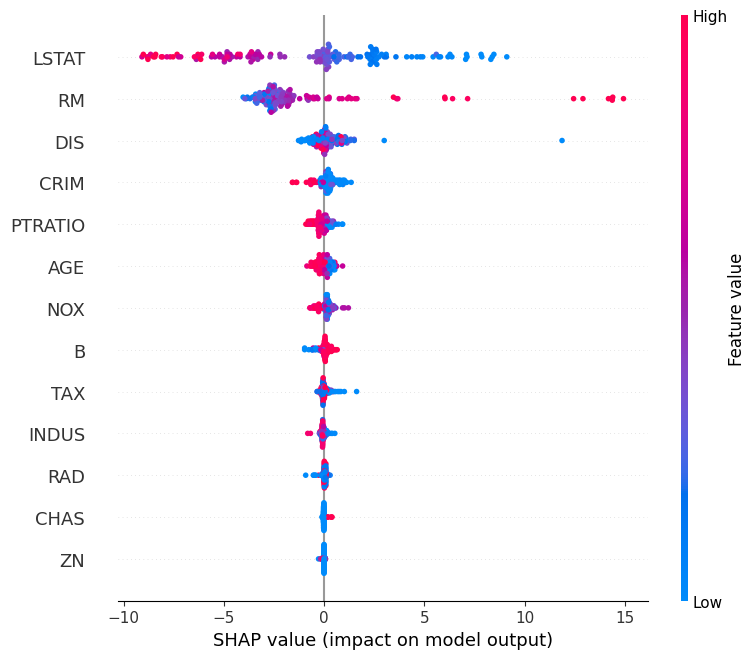

In [9]:
# summary
shap.summary_plot(shap_values, test_x)

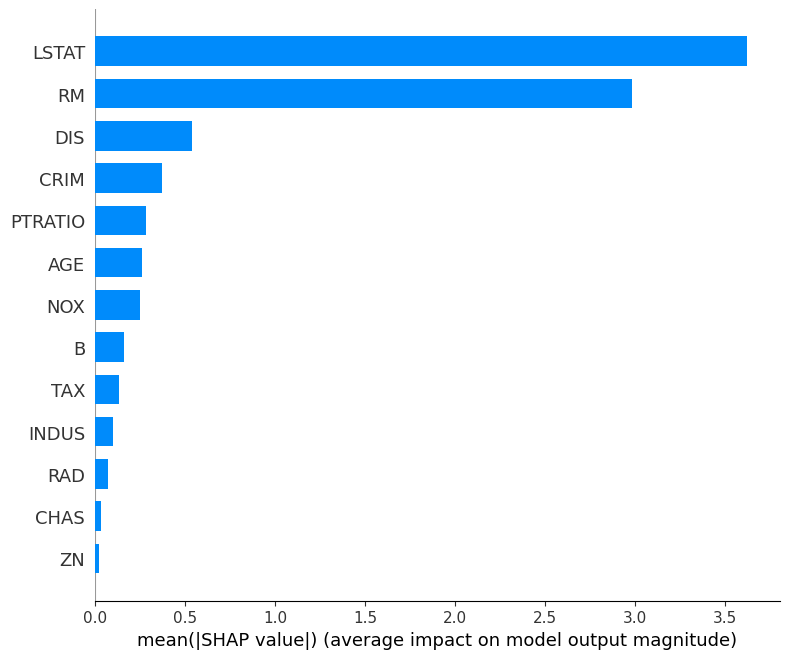

In [10]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_x, plot_type = "bar")